<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib
!pip install seaborn

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-08-24 12:54:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  56.7MB/s    in 2.7s    

2025-08-24 12:54:25 (56.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



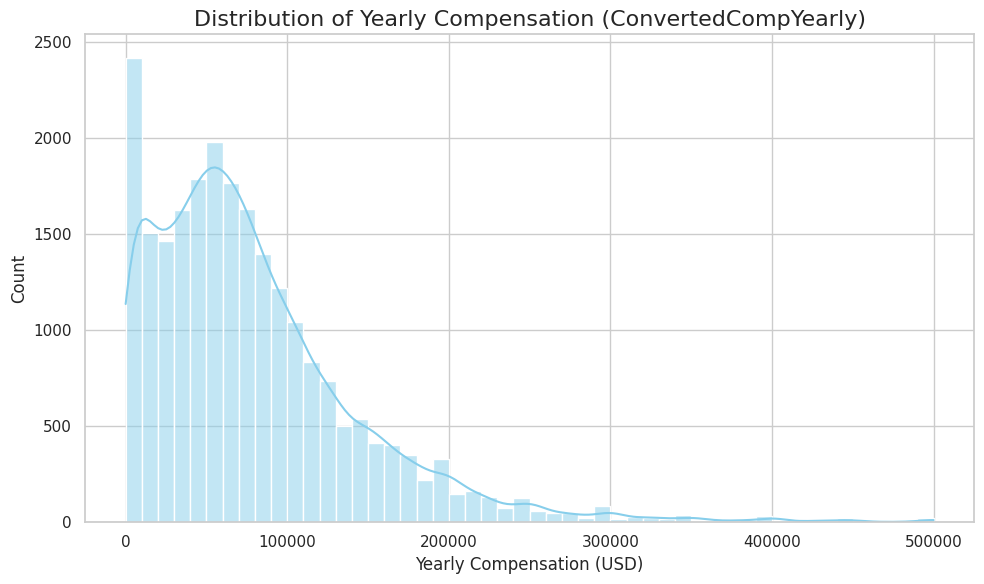

In [4]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Connect to SQLite
conn = sqlite3.connect('survey-results-public.sqlite')

# 2. Load compensation data
query = "SELECT ConvertedCompYearly FROM main WHERE ConvertedCompYearly IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# 3. Convert to numeric and remove invalid values
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna(subset=['ConvertedCompYearly'])

# Optional: filter extreme outliers for better visualization
df = df[df['ConvertedCompYearly'] <= 500000]

# 4. Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



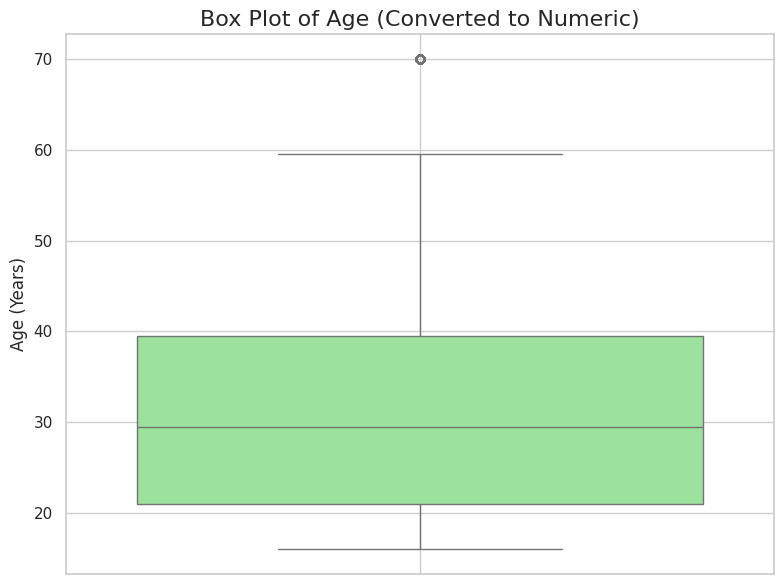

In [5]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Connect to SQLite
conn = sqlite3.connect('survey-results-public.sqlite')

# 2. Load Age data
query = "SELECT Age FROM main WHERE Age IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# 3. Clean Age strings
df['Age'] = df['Age'].str.strip()

# 4. Map age ranges to numeric midpoints
age_to_numeric = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['AgeNumeric'] = df['Age'].map(age_to_numeric)

# Drop any missing values
df = df.dropna(subset=['AgeNumeric'])

# 5. Plot box plot
plt.figure(figsize=(8,6))
sns.boxplot(y=df['AgeNumeric'], color='lightgreen')
plt.title('Box Plot of Age (Converted to Numeric)', fontsize=16)
plt.ylabel('Age (Years)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



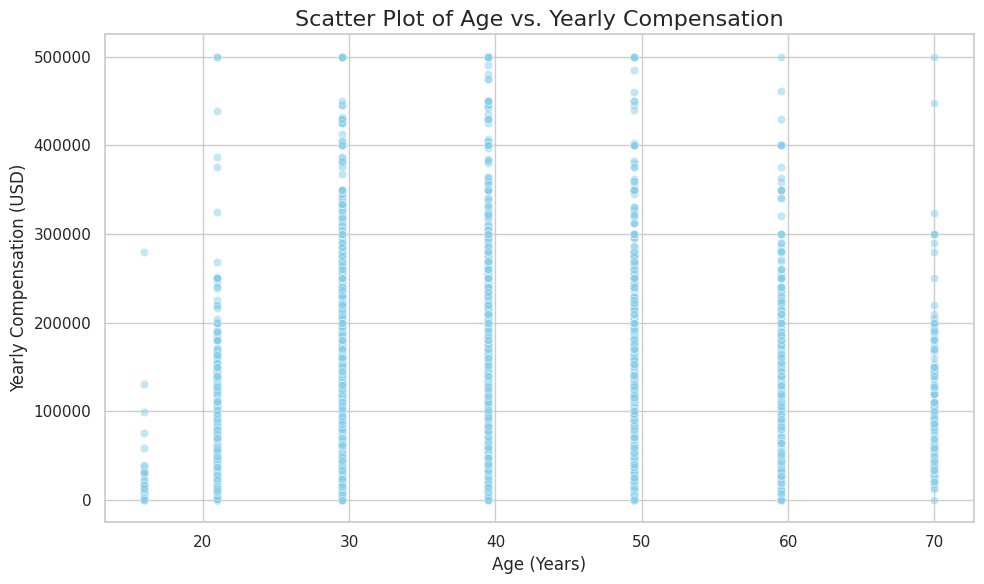

In [6]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Connect to SQLite
conn = sqlite3.connect('survey-results-public.sqlite')

# 2. Load Age and Compensation
query = "SELECT Age, ConvertedCompYearly FROM main WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# 3. Convert Age to numeric midpoints
df['Age'] = df['Age'].str.strip()
age_to_numeric = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['Age_numeric'] = df['Age'].map(age_to_numeric)

# 4. Convert compensation to numeric and filter outliers
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly'])
df = df[df['ConvertedCompYearly'] <= 500000]  # optional outlier filter

# 5. Plot scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age_numeric', y='ConvertedCompYearly', alpha=0.5, color='skyblue')
plt.title('Scatter Plot of Age vs. Yearly Compensation', fontsize=16)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


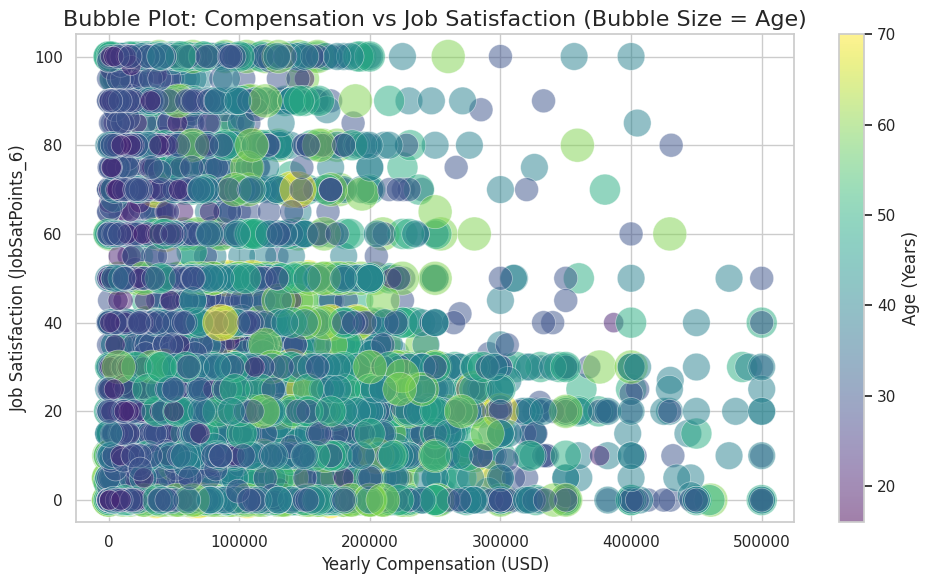

In [7]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Connect to SQLite
conn = sqlite3.connect('survey-results-public.sqlite')

# 2. Load Age, Compensation, and Job Satisfaction
query = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6 
FROM main
WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# 3. Convert Age to numeric midpoints
df['Age'] = df['Age'].str.strip()
age_to_numeric = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['Age_numeric'] = df['Age'].map(age_to_numeric)

# 4. Convert compensation to numeric and filter outliers
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly', 'JobSatPoints_6'])
df = df[df['ConvertedCompYearly'] <= 500000]  # optional outlier filter

# 5. Scale bubble size (optional: multiply by a factor for better visualization)
bubble_size = df['Age_numeric'] * 10  # adjust factor as needed

# 6. Plot bubble chart
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    x=df['ConvertedCompYearly'], 
    y=df['JobSatPoints_6'], 
    s=bubble_size, 
    alpha=0.5, 
    c=df['Age_numeric'], 
    cmap='viridis', 
    edgecolors='w', 
    linewidth=0.5
)

plt.colorbar(scatter, label='Age (Years)')
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



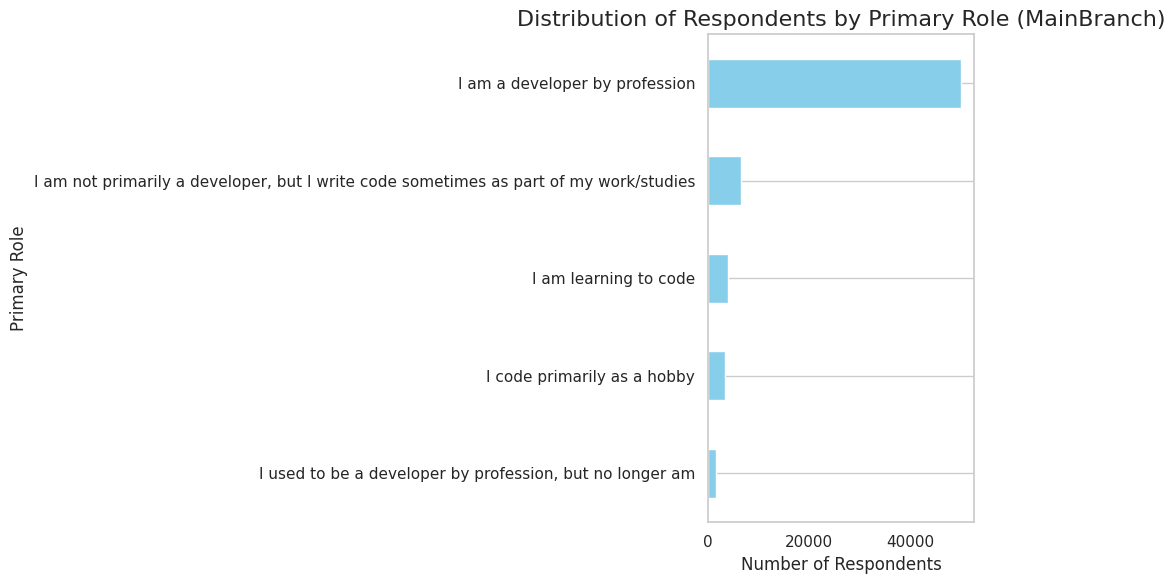

In [8]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Connect to SQLite
conn = sqlite3.connect('survey-results-public.sqlite')

# 2. Load MainBranch data
query = "SELECT MainBranch FROM main WHERE MainBranch IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# 3. Count respondents per MainBranch
branch_counts = df['MainBranch'].value_counts().sort_values(ascending=True)  # sort for horizontal bar chart

# 4. Plot horizontal bar chart
plt.figure(figsize=(10,6))
branch_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of Respondents by Primary Role (MainBranch)', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Primary Role', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



/tmp/ipykernel_638/3562049783.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.index, y=top_languages.values, palette='viridis')


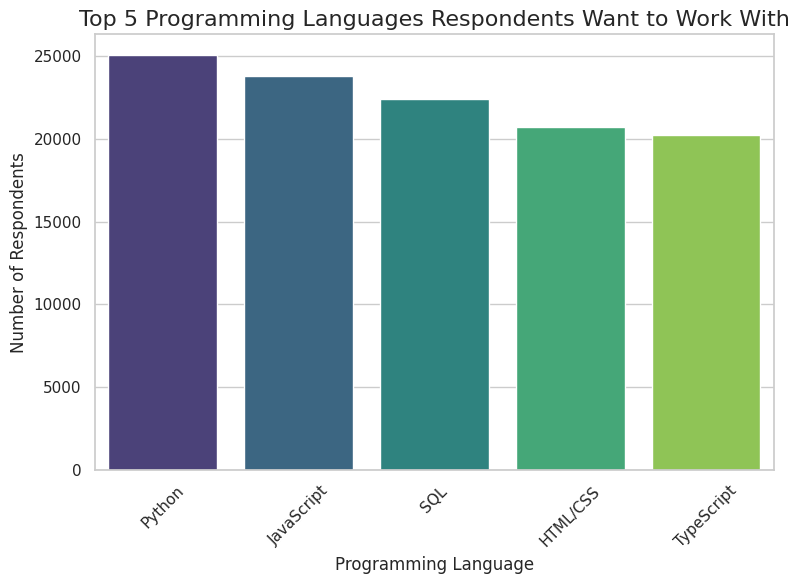

In [9]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Connect to SQLite
conn = sqlite3.connect('survey-results-public.sqlite')

# 2. Load LanguageWantToWorkWith data
query = "SELECT LanguageWantToWorkWith FROM main WHERE LanguageWantToWorkWith IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# 3. Split comma-separated values and explode into rows
df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].str.split(';')
df_exploded = df.explode('LanguageWantToWorkWith')

# Clean whitespace
df_exploded['LanguageWantToWorkWith'] = df_exploded['LanguageWantToWorkWith'].str.strip()

# 4. Count occurrences and get top 5
top_languages = df_exploded['LanguageWantToWorkWith'].value_counts().head(5)

# 5. Plot vertical bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=top_languages.index, y=top_languages.values, palette='viridis')
plt.title('Top 5 Programming Languages Respondents Want to Work With', fontsize=16)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


/tmp/ipykernel_638/2001499424.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()


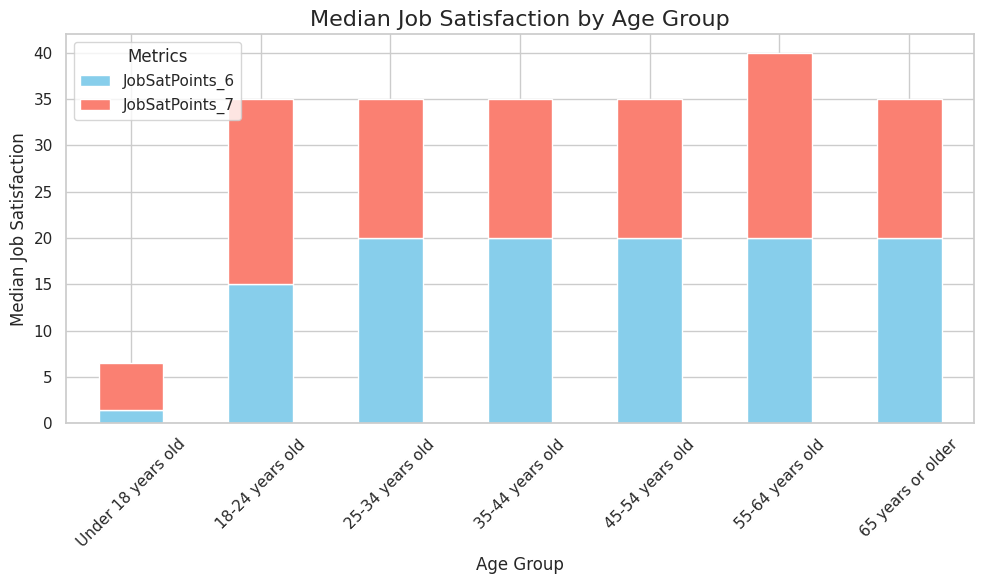

In [10]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Connect to SQLite
conn = sqlite3.connect('survey-results-public.sqlite')

# 2. Load Age and Job Satisfaction columns
query = """
SELECT Age, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL AND JobSatPoints_7 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# 3. Clean Age and convert to ordered categories
df['Age'] = df['Age'].str.strip()
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# 4. Calculate median JobSatPoints_6 and JobSatPoints_7 per age group
median_satisfaction = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# 5. Plot stacked bar chart
median_satisfaction.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'salmon'])

plt.title('Median Job Satisfaction by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Job Satisfaction', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'], title='Metrics')
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



/tmp/ipykernel_638/72421047.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_db_counts.index, y=top_db_counts.values, palette='coolwarm')


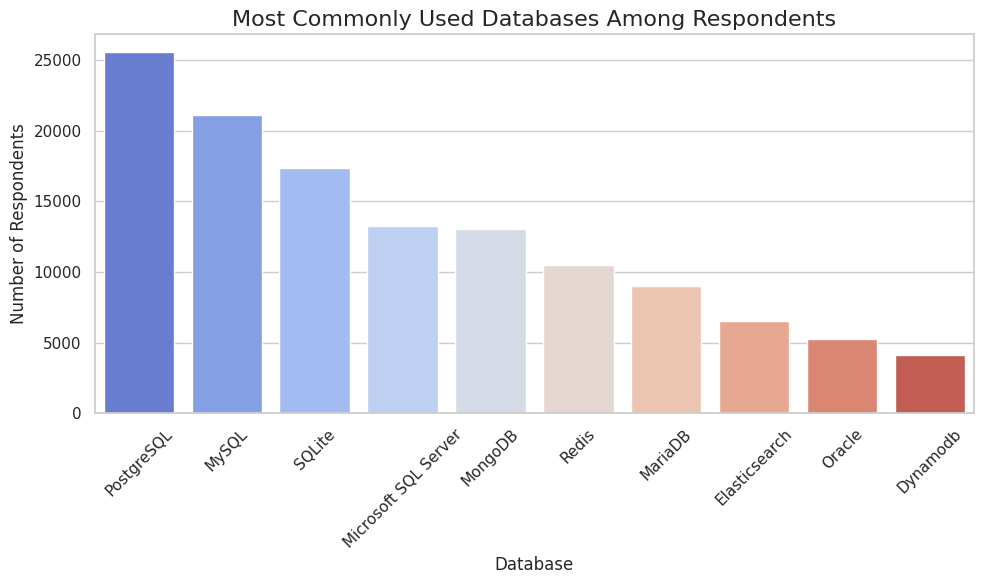

In [11]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Connect to SQLite
conn = sqlite3.connect('survey-results-public.sqlite')

# 2. Load DatabaseHaveWorkedWith data
query = "SELECT DatabaseHaveWorkedWith FROM main WHERE DatabaseHaveWorkedWith IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# 3. Split semicolon-separated values and explode
df['DatabaseHaveWorkedWith'] = df['DatabaseHaveWorkedWith'].str.split(';')
df_exploded = df.explode('DatabaseHaveWorkedWith')

# Clean whitespace
df_exploded['DatabaseHaveWorkedWith'] = df_exploded['DatabaseHaveWorkedWith'].str.strip()

# 4. Count occurrences
db_counts = df_exploded['DatabaseHaveWorkedWith'].value_counts()

# Optional: Take top 10 for readability
top_db_counts = db_counts.head(10)

# 5. Plot vertical bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=top_db_counts.index, y=top_db_counts.values, palette='coolwarm')
plt.title('Most Commonly Used Databases Among Respondents', fontsize=16)
plt.xlabel('Database', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_638/82785729.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_comp = df.groupby('Age')['ConvertedCompYearly'].median().reset_index()
/tmp/ipykernel_638/82785729.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_comp, x='Age', y='ConvertedCompYearly', palette='Blues_d')


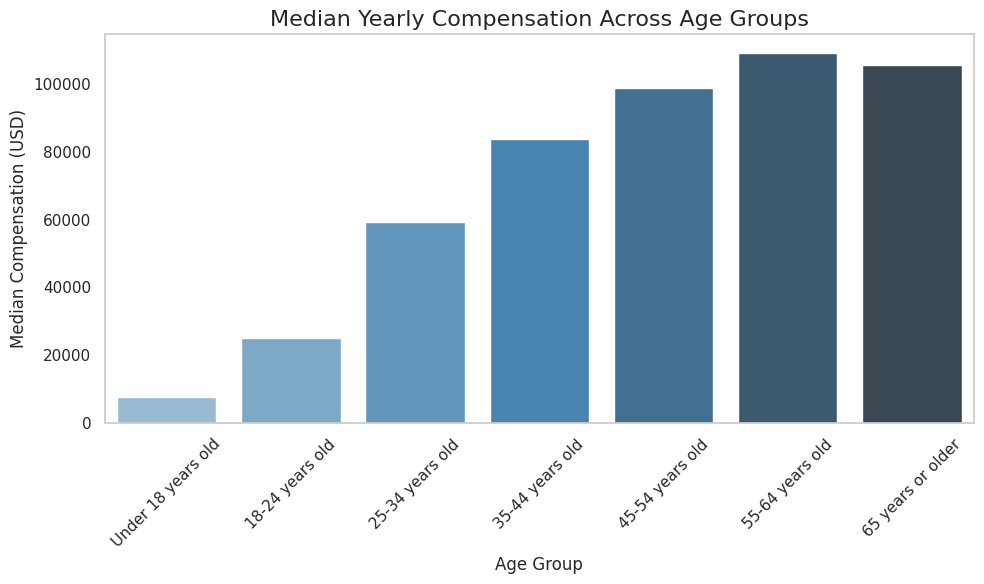

In [12]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Connect to SQLite
conn = sqlite3.connect('survey-results-public.sqlite')

# 2. Load Age and ConvertedCompYearly
query = "SELECT Age, ConvertedCompYearly FROM main WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# 3. Convert Age ranges to ordered categories
df['Age'] = df['Age'].str.strip()
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old',
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# 4. Convert compensation to numeric and filter outliers
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna(subset=['ConvertedCompYearly'])
df = df[df['ConvertedCompYearly'] <= 500000]  # optional outlier filter

# 5. Calculate median compensation per age group
median_comp = df.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# 6. Plot grouped bar chart (single metric)
plt.figure(figsize=(10,6))
sns.barplot(data=median_comp, x='Age', y='ConvertedCompYearly', palette='Blues_d')
plt.title('Median Yearly Compensation Across Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Compensation (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



/tmp/ipykernel_638/3632277669.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


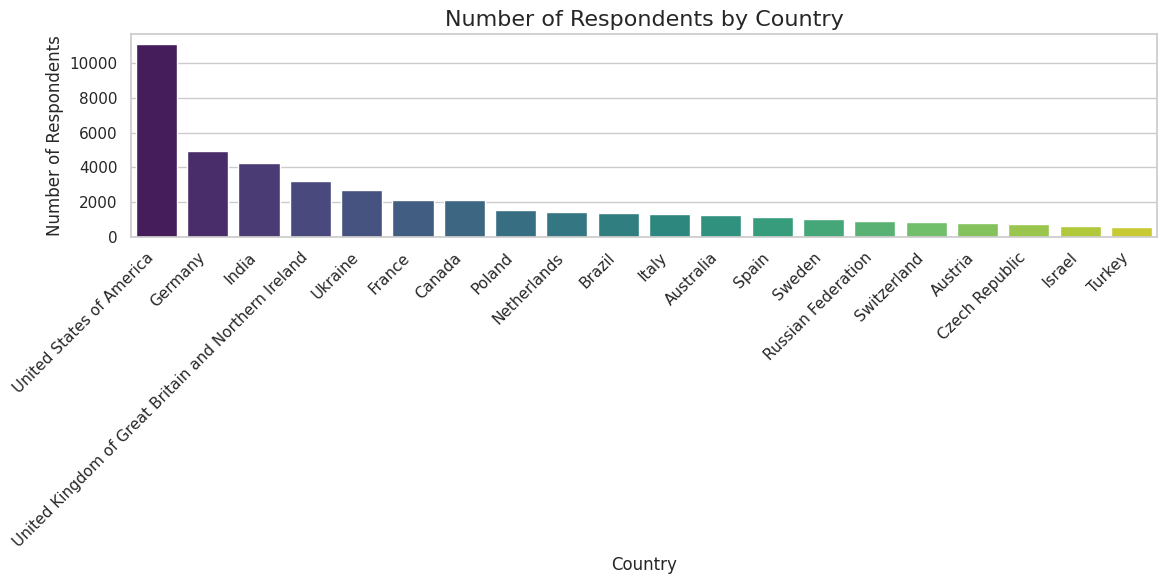

In [13]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Connect to SQLite
conn = sqlite3.connect('survey-results-public.sqlite')

# 2. Load Country data
query = "SELECT Country FROM main WHERE Country IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# 3. Count respondents per country
country_counts = df['Country'].value_counts()

# Optional: take top 20 countries for readability
top_countries = country_counts.head(20)

# 4. Plot vertical bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Number of Respondents by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
